<a href="https://colab.research.google.com/github/CapZondar/Python-first-steps/blob/main/Literacy_Rates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Literacy rate analysis
### Submitted by John Vincent "JT" Aquilizan
* Completed on 09/29/2022

In [1222]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1223]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1224]:
filename = ('/content/drive/MyDrive/Coding Dojo - Data Science/Belt Exam/literacy_rates.csv')

df = pd.read_csv(filename)
df

,Region,Country,Year,Age,Gender,Literacy rate
0,Central and Southern Asia,Afghanistan,2011,15+,female,0.1761206
1,Central and Southern Asia,Afghanistan,2011,15+,male,0.454171
2,Central and Southern Asia,Afghanistan,2011,15+,total,0.3174112
3,NaN,Afghanistan,2011,15-24,female,0.3211322
4,NaN,Afghanistan,2011,15-24,male,0.6187907
...,...,...,...,...,...,...
4950,Sub-Saharan Africa,Zimbabwe,2014,25-64,male,0.8972553999999999
4951,Sub-Saharan Africa,Zimbabwe,2014,25-64,total,0.8878737
4952,Sub-Saharan Africa,Zimbabwe,2014,65+,female,0.7342576
4953,Sub-Saharan Africa,Zimbabwe,2014,65+,male,0.9272311000000001


In [1225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4955 entries, 0 to 4954
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Region         4950 non-null   object
 1   Country        4955 non-null   object
 2   Year           4955 non-null   int64 
 3   Age            4955 non-null   object
 4   Gender         4955 non-null   object
 5   Literacy rate  4955 non-null   object
dtypes: int64(1), object(5)
memory usage: 232.4+ KB


In [1226]:
#Since the literacy rate is listed as an object instead of float, we will be converting the data type.
#Initially tried to convert the entire column to float but was having issues because of 1 value showing as percent instead of decimal.
#To address the issue I have created a function to strip the % sign and also convert the value directly to float. This is based on a solution I found 
#from: https://stackoverflow.com/questions/12432663/what-is-a-clean-way-to-convert-a-string-percent-to-a-float // I chose this function to make sure that the solution is scalable and to ensure I know how to replicate in the future

stripping = lambda x: (x.strip('%'))

df2 = df['Literacy rate'].apply(stripping)
df['Literacy Rate'] = df2
df.drop(columns=['Literacy rate'],inplace=True)
df["Literacy Rate"] = df['Literacy Rate'].astype(float)
print(df.dtypes)

#PARKED QUESTION: I had difficulty in changing the value itself on the column for literacy rate so I decided to create a new column based on the new series created by the function

Region            object
Country           object
Year               int64
Age               object
Gender            object
Literacy Rate    float64
dtype: object


In [1227]:
div = lambda x: x/100 if(x>1) else x

df3 = df['Literacy Rate'].apply(div)
df['Literacy Rate'] = df3

In [1228]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4955 entries, 0 to 4954
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         4950 non-null   object 
 1   Country        4955 non-null   object 
 2   Year           4955 non-null   int64  
 3   Age            4955 non-null   object 
 4   Gender         4955 non-null   object 
 5   Literacy Rate  4955 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 232.4+ KB


,Region,Country,Year,Age,Gender,Literacy Rate
0,Central and Southern Asia,Afghanistan,2011,15+,female,0.176121
1,Central and Southern Asia,Afghanistan,2011,15+,male,0.454171
2,Central and Southern Asia,Afghanistan,2011,15+,total,0.317411
3,NaN,Afghanistan,2011,15-24,female,0.321132
4,NaN,Afghanistan,2011,15-24,male,0.618791
...,...,...,...,...,...,...
4950,Sub-Saharan Africa,Zimbabwe,2014,25-64,male,0.897255
4951,Sub-Saharan Africa,Zimbabwe,2014,25-64,total,0.887874
4952,Sub-Saharan Africa,Zimbabwe,2014,65+,female,0.734258
4953,Sub-Saharan Africa,Zimbabwe,2014,65+,male,0.927231


In [1229]:
#Checking for duplicates
df.duplicated().any()

False

In [1230]:
#Checking for any null values

df.isna().sum()

Region           5
Country          0
Year             0
Age              0
Gender           0
Literacy Rate    0
dtype: int64

In [1231]:
#after finding out that only Region has missing values, I further checked on what countries have missing region values

missing_region = df['Region'].isna()

df[missing_region]

,Region,Country,Year,Age,Gender,Literacy Rate
3,NaN,Afghanistan,2011,15-24,female,0.321132
4,NaN,Afghanistan,2011,15-24,male,0.618791
464,NaN,Uzbekistan,2016,65+,female,0.996697
465,NaN,Uzbekistan,2016,65+,male,0.999018
466,NaN,Uzbekistan,2016,65+,total,0.997719


In [1232]:
#Since we know that both of the countries that have missing region values are from Central and Southern Asia, we will simply fill the value up with the right region.

df['Region'].fillna('Central and Southern Asia',inplace = True)
df['Region'].isna().sum()

0

In [1233]:
#Now checking the numerical values for inconsistencies or odd values

print(df.agg({'Literacy Rate':['min','mean','max']}),"\n\n",
df.agg({'Age':['min','max','mean']}))

      Literacy Rate
min        0.004025
mean       0.816947
max        1.000000 

      Age
min  15+
max  65+


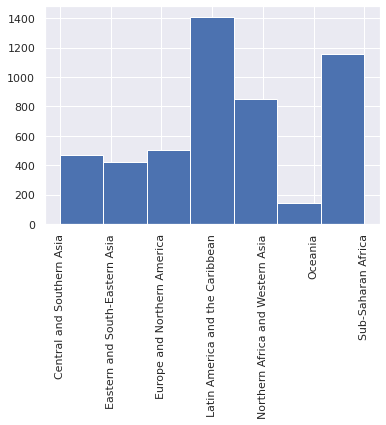

In [1234]:
#Checking which regions we have the most data

plt.xticks(rotation = 90)
plt.hist(df['Region'],bins=7);

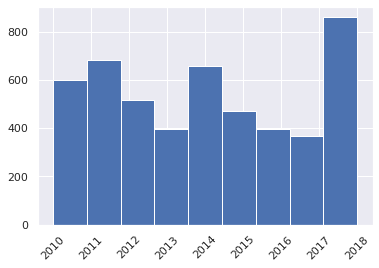

In [1235]:
#Checking which year we received the most response
plt.xticks(rotation = 45)
plt.hist(df['Year'],bins=9);

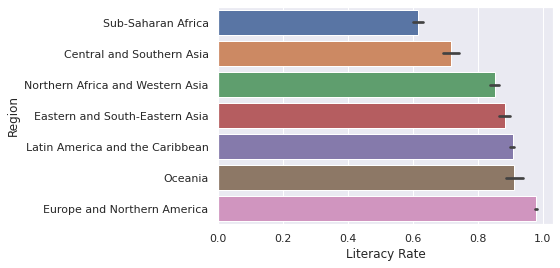

In [1236]:
#To address the main issue and help the organization decide where to put the extra effort in, we have plotted a graph showing the average literacy rate per region. 

per_region = df.groupby('Region').mean().sort_values('Literacy Rate').index

sns.set_color_codes("pastel")
sns.set_style("darkgrid")
sns.barplot(data=df,x='Literacy Rate',y='Region',order=per_region)
plt.show()

#I was able to sort the barplot base from this source: https://stackoverflow.com/questions/70052556/how-to-order-the-bars-in-a-seaborn-barplot

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


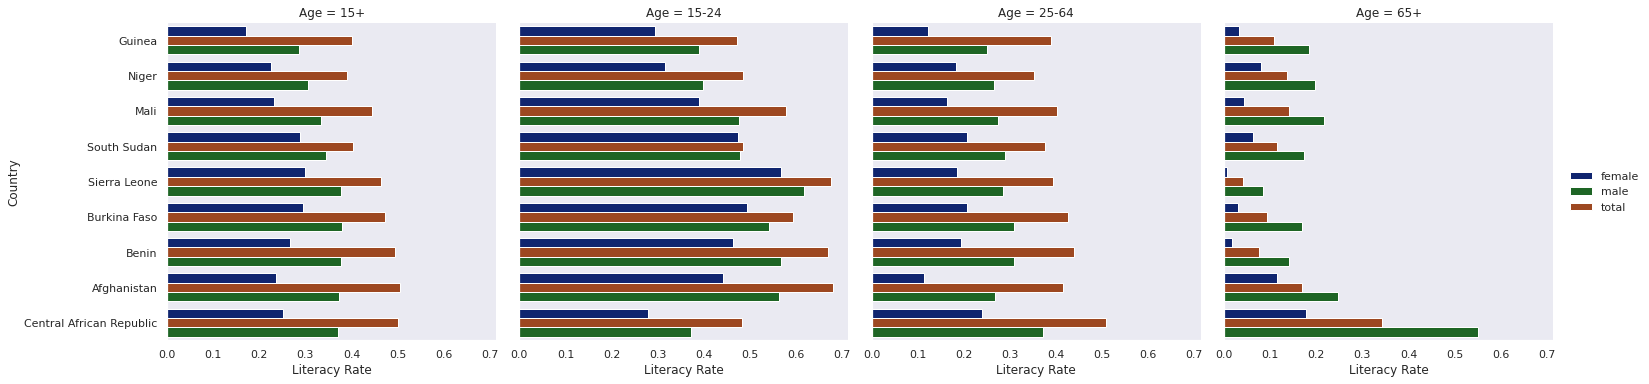

In [1237]:
#Since we see that the 2 region that has the most iliterate population is entral and Southern Asia and Sub-Saharan Africa, we will mainly focus on finding out on which countries needs the most help.

csa = df['Region'] == 'Central and Southern Asia'
ssa = df['Region'] == 'Sub-Saharan Africa'
youth = df['Age'] == '15-24'
low_lr_region = df[csa | ssa]
per_country = low_lr_region.groupby('Country')['Literacy Rate'].mean().sort_values().index

sns.set_style('dark')
#sns.barplot(x='Literacy Rate',y='Country',data=low_lr_region,order=per_country[1:10],ci=None);
#low_lr_region.groupby('Country')['Literacy Rate'].mean().sort_values()[1:10]
grid = sns.FacetGrid(low_lr_region,col='Age',size=5.5);
sns.set(font_scale=1);
grid.map_dataframe(sns.barplot,y='Country',x='Literacy Rate',hue='Gender',order=per_country[1:10],ci=None,palette='dark');
grid.add_legend();

#Since we are mostly interested in helping the youth in becoming literate, we will focus on the first 2 plots.
#Here We can see that on most of the countries, female is the more dominant in terms of iliteracty.
#It would be best for the organization to launch more events or activites encouraging female to self-empowerment by becoming more literate. 